In [5]:
%pylab inline
pylab.style.use('Thin')
import scipy, stmpy, matplotlib

Populating the interactive namespace from numpy and matplotlib


In [3]:
ta = stmpy.read_all.qkrdasciifile('A.csv', delimiter=', ')
tb = stmpy.read_all.qkrdasciifile('B.csv', delimiter=', ')

229 row(s), 2 column(s) data loaded
Header:
Endnote:
198 row(s), 2 column(s) data loaded
Header:
Endnote:


In [11]:
geo = stmpy.load('tablevstemp001.nsp')
geo.header

{'COMMENT': '',
 'DATASIZECOLS': 1024,
 'DATASIZEROWS': 651,
 'DATA_TYPE': 'FLOAT            MSBFIRST',
 'DELTA_f': '2.441E-1',
 'END_DATE': '26.01.2018',
 'END_TIME': '10:18:24',
 'Experiment': 'LTSpectrum',
 'SIGNAL': 'Table GS-1 (m/s)',
 'SPECTRUM_VERSION': 2,
 'START_DATE': '26.01.2018',
 'START_TIME': '09:34:01',
 'User': ''}

In [22]:
959*0.2441

234.0919

In [17]:
geo.fftSignal.shape, geo.fftSignal.min(), geo.fftSignal.max()

((1024, 651), 6.625005231908343e-12, 8.378102393180598e-06)

Text(0,0.5,'Frequency (Hz)')

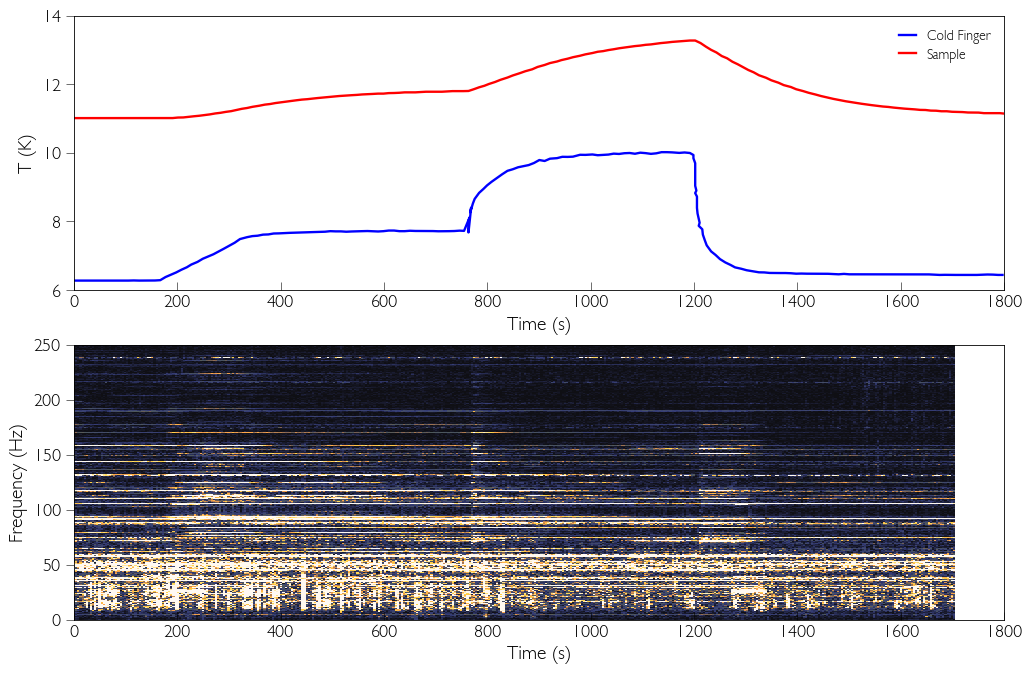

In [109]:
figure(figsize=[12, 8])
subplot(211)
plot(ta[0], ta[1], 'b', label='Cold Finger')
plot(tb[0], tb[1], 'r', label='Sample')
xlim(0, 1800)
ylim(6, 14)
xlabel('Time (s)')
ylabel('T (K)')
legend(loc='best')
subplot(212)
imshow(geo.fftSignal, extent=[geo.time[0]-959, geo.time[-1]-959, geo.freq[0], geo.freq[-1]], origin='lower',\
       cmap=stmpy.cm.jackyPSD)
clim(1e-8, 4e-7)
xlim(0, 1800)
xlabel('Time (s)')
ylabel('Frequency (Hz)')

Text(0,0.5,'Freq (Hz)')

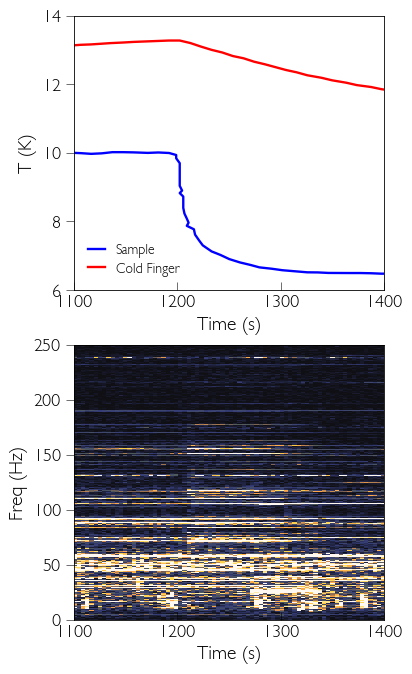

In [102]:
start, stop = 1100, 1400
figure(figsize=[4, 8])
subplot(211)
plot(ta[0], ta[1], 'b', label='Sample')
plot(tb[0], tb[1], 'r', label='Cold Finger')
xlim(start, stop)
ylim(6, 14)
xlabel('Time (s)')
ylabel('T (K)')
legend(loc='best')
subplot(212)
imshow(geo.fftSignal, extent=[geo.time[0]-959, geo.time[-1]-959, geo.freq[0], geo.freq[-1]], origin='lower',\
       cmap=stmpy.cm.jackyPSD)
clim(1e-8, 4e-7)
xlim(start, stop)
xlabel('Time (s)')
ylabel('Freq (Hz)')

In [94]:
geo.time[530:540]-959

array([1212.36923077, 1216.46615385, 1220.56307692, 1224.66      ,
       1228.75692308, 1232.85384615, 1236.95076923, 1241.04769231,
       1245.14461538, 1249.24153846])

In [82]:
geo.fftSignal[:, 1200:1250]

array([], shape=(1024, 0), dtype=float64)

72.09188660801564

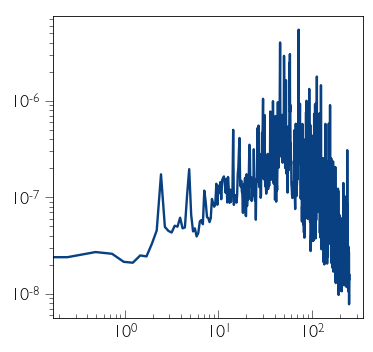

In [98]:
loglog(geo.freq, mean(geo.fftSignal[:, 530:540], axis=-1))
geo.freq[argmax(mean(geo.fftSignal[:, 530:540], axis=-1))]

In [35]:
geo.freq[1]

0.24437927663734116

In [26]:
pk24 = geo.fftSignal[10, :]

In [54]:
georms = zeros_like(pk24)
for ix in range(geo.fftSignal.shape[-1]):
    fqs = arange(3)*10
    tmp = geo.fftSignal[fqs, ix]
    georms[ix] = sum(sqrt(tmp**2 * geo.freq[1]))

Text(0.5,0,'Time (s)')

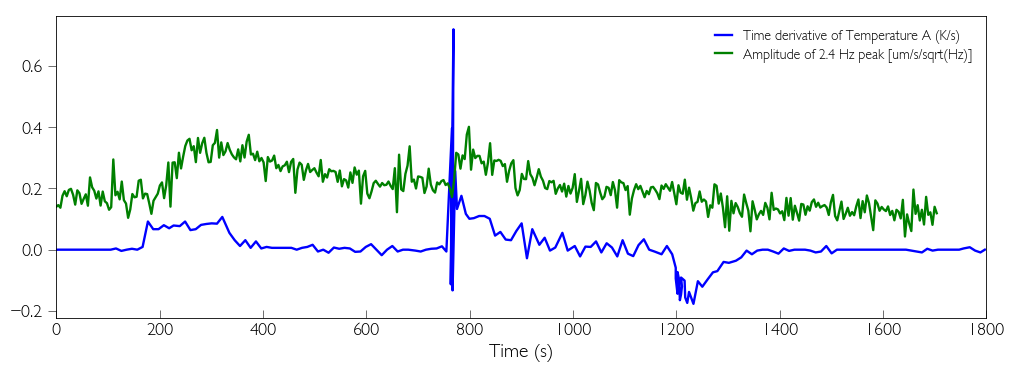

In [108]:
figure(figsize=[12, 4])
plot(ta[0, 1:], diff(ta[1]), 'b', label='Time derivative of Temperature A (K/s)')
#plot(tb[0, 1:], diff(tb[1])*8e-7, 'r')
#plot(geo.time-959, georms, 'm')
plot(geo.time-959, pk24*1e6, 'g', label='Amplitude of 2.4 Hz peak [um/s/sqrt(Hz)]')
xlim(0, 1800)
legend(loc='best')
xlabel('Time (s)')